In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

Cardiovascular Disease dataset sourced from Kaggle (https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset)

In [2]:
cvd_data = pd.read_csv('cardio_train.csv', delimiter=';')

shape = cvd_data.shape
print(f"CVD data has {shape[0]} rows and {shape[1]} columns.")

CVD data has 70000 rows and 13 columns.


### Data Exploration and Preprocessing

In [3]:
cvd_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
cvd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
cvd_data.isnull().sum()

,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


In [6]:
cvd_data.isna().sum()

,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


In [7]:
cvd_data.empty

False

No missing, null or NA values.

In [8]:
cvd_data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
## Convert age column so it shows years instead of days
cvd_data['age'] = cvd_data['age']/365.25 #.25 accounts for leap years too
cvd_data['age'] = cvd_data['age'].round().astype(int)

In [10]:
cvd_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0


In [11]:
cvd_data['weight'] = cvd_data['weight'].round().astype(int)

In [12]:
cvd_data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62,110,80,1,1,0,0,1,0
1,1,55,1,156,85,140,90,3,1,0,0,1,1
2,2,52,1,165,64,130,70,3,1,0,0,0,1
3,3,48,2,169,82,150,100,1,1,0,0,1,1
4,4,48,1,156,56,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53,2,168,76,120,80,1,1,1,0,1,0
69996,99995,62,1,158,126,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72,135,80,1,2,0,0,0,1


In [13]:
cvd_data.drop('id', axis=1, inplace=True)

In [16]:
cvd_data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.303157,1.349571,164.359229,74.205543,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.760171,0.476838,8.210126,14.395829,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## Data Visualization

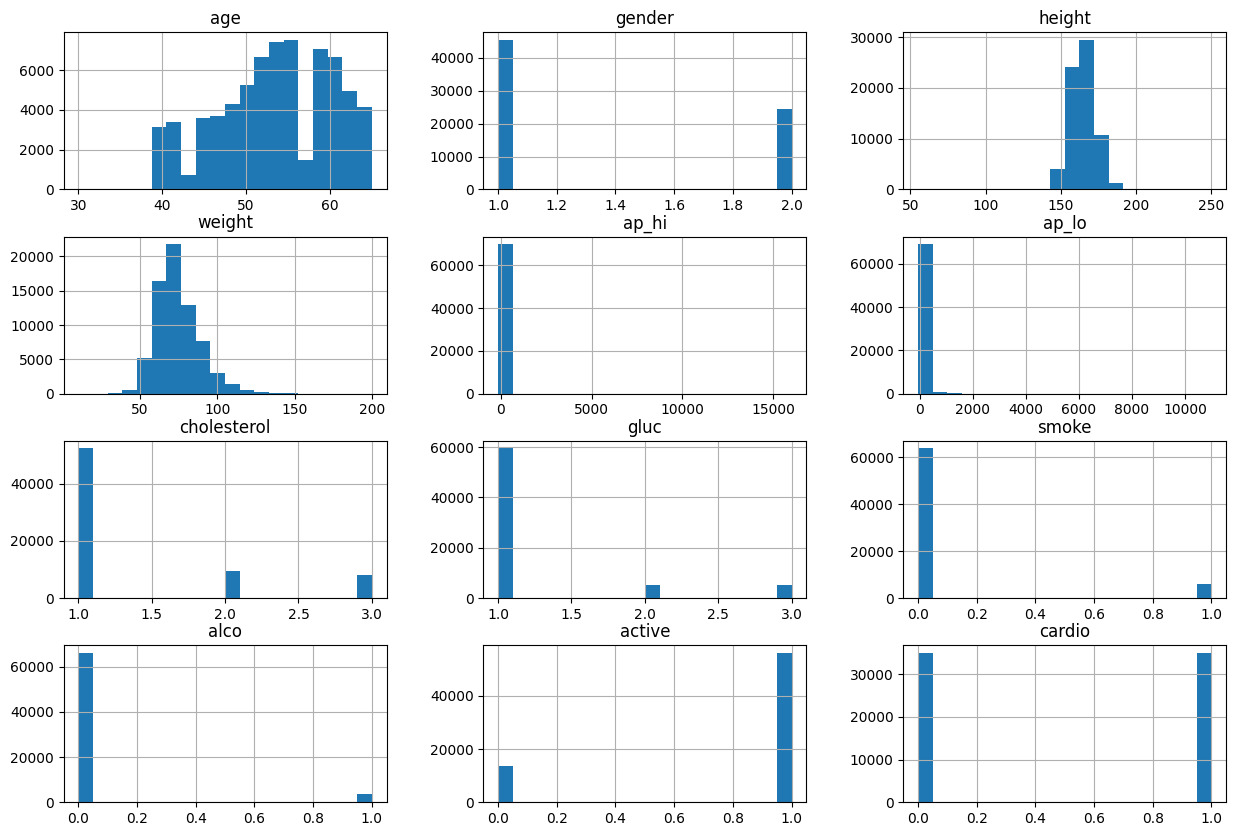

In [17]:
cvd_data.hist(bins=20, figsize=(15,10))
plt.show()

In [18]:
cvd_data['cardio'].value_counts().sort_index()

,count
cardio,
0,35021
1,34979


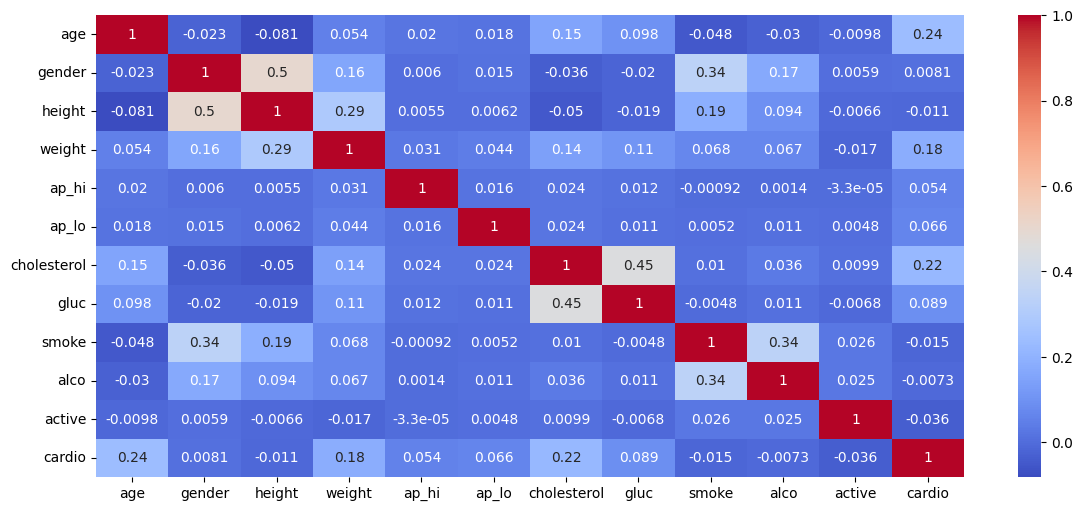

In [20]:
## Correlation matrix to see which variables affect CVD most
plt.figure(figsize=(14,6))
correlation = cvd_data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

According to the heatmap, CVD is positively correlated with features like cholesterol, glucose and weight. While this lines with our initial assumptions, our cholesterol feature is grouped into 3 groups (normal, above normal, and well above normal), rather than discrete values, which threatens the accuracy our model can reach.

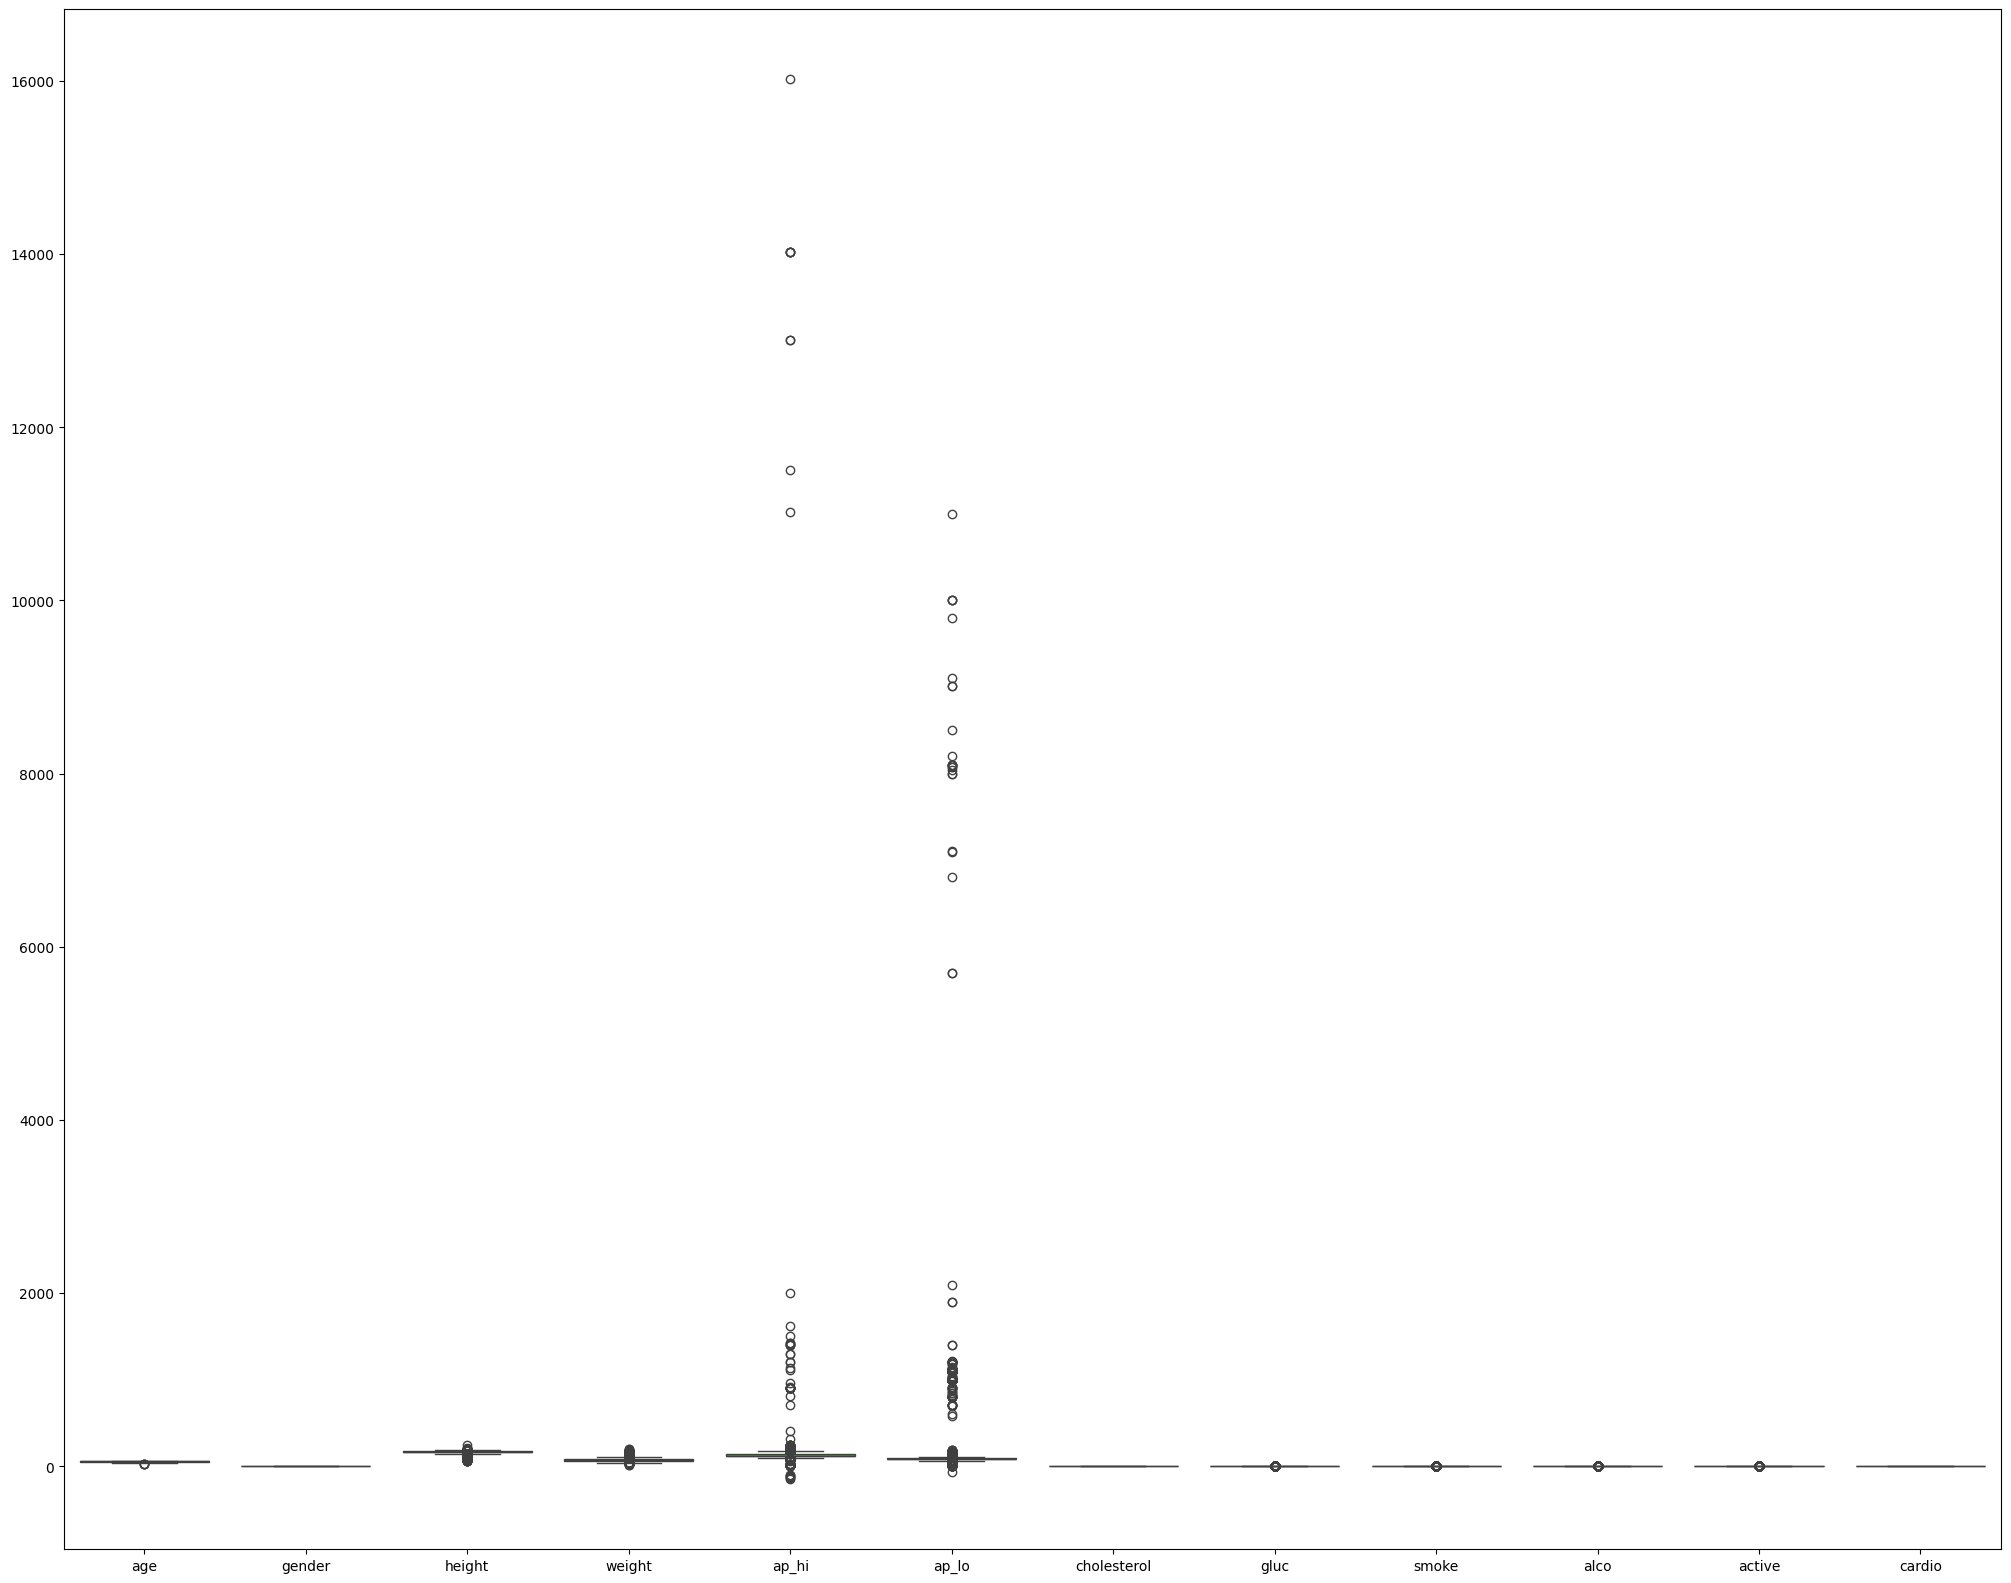

In [19]:
# Identify outlier existence
plt.figure(figsize=(25,20))
sns.boxplot(data=cvd_data)
plt.show()

ap_hi and ap_lo, referring to systolic and dystolic blood pressure, respectively, both show significant outliers.

In [21]:
## Determine number of outliers with IQR
quartile1 = cvd_data.quantile(0.25) #value below which 25% of data falls
quartile3 = cvd_data.quantile(0.75) #value below which 75% of data falls
iqr = quartile3 - quartile1 #range for middle 50% of data

# Boundaries for data; if outside these values, they're considered outliers
lower_bound = quartile1 - 1.5 * iqr
upper_bound = quartile3 + 1.5 * iqr
outliers = (cvd_data < lower_bound) | (cvd_data > upper_bound) #Looks at each value in original dataset to determine if it's an outlier

In [22]:
# Count of outliers for every feature
outliers.sum()


,0
age,4
gender,0
height,519
weight,1819
ap_hi,1435
ap_lo,4632
cholesterol,0
gluc,10521
smoke,6169
alco,3764


We choose to ignore the outliers of binary features (e.g, smoking, alcohol intake and physical inactivity) as they were self-reported. The discrete values of systolic and diastolic blood pressure is predicted to affect the accuracy more than other features, but we'll see the extent first before deciding to remove them. We hypothesize that since there's less than 10% of instances with outliers, the final accuracy won't be too heavily influenced.

## Split train/test set and Feature Scaling

In [23]:
# Separate features and target
X = cvd_data.drop(columns=['cardio'])
y = cvd_data['cardio']

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=555)

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Neural Network


In [41]:
# For NN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback, EarlyStopping

# For metrics
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
from tqdm import tqdm

Graph loss curve to determine max number of epocha to run without excessive runtime, and to get some insight into best performing activation function.

In [36]:
def determine_epoch_model(activation_function):
  model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation=activation_function),
    Dense(32, activation=activation_function),
    Dense(1, activation='sigmoid') #1 output neuron for binary classification
  ])
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model

# Callback to calculate F1 score and ROC-AUC at the end of each epoch
class MetricsCallback(Callback):
    def __init__(self, X_val, y_val):
        self.X_val = X_val
        self.y_val = y_val
        self.f1_scores = []
        self.roc_auc_scores = []

    def on_epoch_end(self, epoch, logs=None):
        y_pred = (self.model.predict(self.X_val) > 0.5).astype("int32")
        f1 = f1_score(self.y_val, y_pred)
        roc_auc = roc_auc_score(self.y_val, y_pred)

        self.f1_scores.append(f1)
        self.roc_auc_scores.append(roc_auc)

In [34]:
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=777)
histories = {}

for activation_function in ['relu', 'sigmoid', 'tanh']:
    f1_scores_per_epoch = []
    roc_auc_scores_per_epoch = []
    accuracy_per_epoch = []
    losses_per_epoch = []

    for train_index, val_index in skf.split(X_train_scaled, y_train):
        X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        model = determine_epoch_model(activation_function)
        metrics_callback = MetricsCallback(X_val_fold, y_val_fold)

        # Train the model with a progress bar for each epoch
        with tqdm(total=100, desc=f'Training with {activation_function} activation') as pbar:
            history = model.fit(X_train_fold, y_train_fold,
                                epochs=100,
                                batch_size=32,
                                validation_data=(X_val_fold, y_val_fold),
                                verbose=0,
                                callbacks=[metrics_callback,
                                           EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
                                )
            # Update progress bar for each epoch
            for _ in range(len(history.history['loss'])):
                pbar.update(1)

        # Collect history for each metric
        f1_scores_per_epoch.append(metrics_callback.f1_scores)
        roc_auc_scores_per_epoch.append(metrics_callback.roc_auc_scores)
        accuracy_per_epoch.append(history.history['val_accuracy'])
        losses_per_epoch.append(history.history['val_loss'])

    # Determine minimum length across all folds for truncation
    min_epochs = min(map(len, f1_scores_per_epoch))

    # Truncate all metrics to the minimum number of epochs
    avg_f1_scores = np.mean([f1[:min_epochs] for f1 in f1_scores_per_epoch], axis=0)
    avg_roc_auc_scores = np.mean([roc[:min_epochs] for roc in roc_auc_scores_per_epoch], axis=0)
    avg_accuracies = np.mean([acc[:min_epochs] for acc in accuracy_per_epoch], axis=0)
    avg_losses = np.mean([loss[:min_epochs] for loss in losses_per_epoch], axis=0)

    histories[activation_function] = {
        'f1_scores': avg_f1_scores,
        'roc_auc_scores': avg_roc_auc_scores,
        'accuracies': avg_accuracies,
        'losses': avg_losses
    }

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
Training with relu activation:   0%|          | 0/100 [00:00<?, ?it/s]

511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Training with relu activation:  21%|██        | 21/100 [01:32<05:47,  4.39s/it] 
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
Training with relu activation:   0%|          | 0/100 [00:00<?, ?it/s]

511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━

Training with relu activation:  28%|██▊       | 28/100 [02:09<05:32,  4.62s/it]  
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
Training with relu activation:   0%|          | 0/100 [00:00<?, ?it/s]

511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
511/511 ━━━━━━━━

Training with relu activation:  27%|██▋       | 27/100 [02:04<05:36,  4.60s/it]  
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
Training with sigmoid activation:   0%|          | 0/100 [00:00<?, ?it/s]

511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━

Training with sigmoid activation:  53%|█████▎    | 53/100 [04:03<03:36,  4.60s/it]  
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
Training with sigmoid activation:   0%|          | 0/100 [00:00<?, ?it/s]

511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━

Training with sigmoid activation:  45%|████▌     | 45/100 [03:27<04:13,  4.60s/it]  
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
Training with sigmoid activation:   0%|          | 0/100 [00:00<?, ?it/s]

511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━

Training with sigmoid activation:  60%|██████    | 60/100 [04:29<02:59,  4.49s/it]  
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
Training with tanh activation:   0%|          | 0/100 [00:00<?, ?it/s]

511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
511/511 ━━━━━━━━

Training with tanh activation:  31%|███       | 31/100 [02:19<05:10,  4.51s/it]  
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
Training with tanh activation:   0%|          | 0/100 [00:00<?, ?it/s]

511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━

Training with tanh activation:  28%|██▊       | 28/100 [02:12<05:41,  4.75s/it]  
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
Training with tanh activation:   0%|          | 0/100 [00:00<?, ?it/s]

511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Training with tanh activation:  22%|██▏       | 22/100 [01:39<05:54,  4.55s/it] 


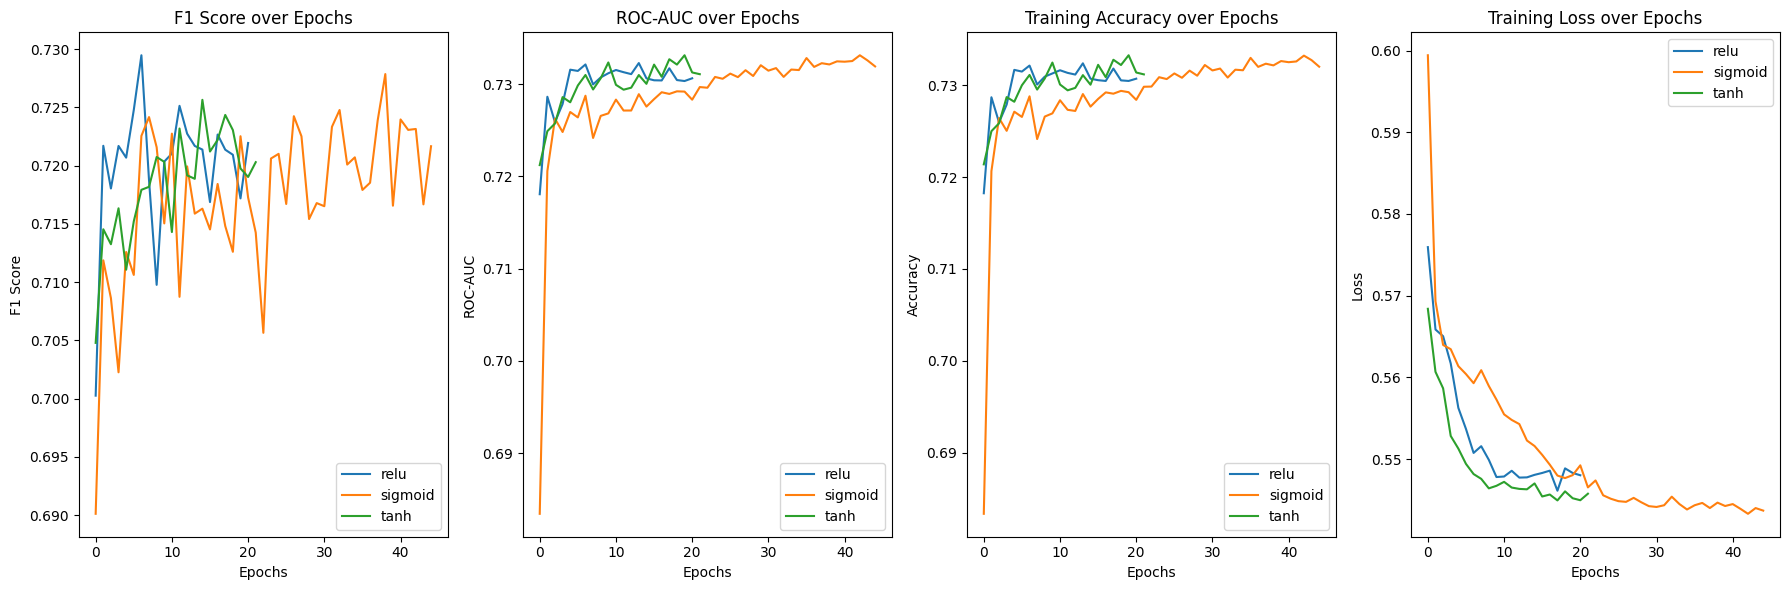

In [38]:

# Plot metrics over epochs for each activation function
plt.figure(figsize=(18, 6))

# Plot F1 Scores
plt.subplot(1, 4, 1)
for activation_function, history in histories.items():
    plt.plot(history['f1_scores'], label=f'{activation_function}')
plt.title('F1 Score over Epochs')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()

# Plot ROC-AUC Scores
plt.subplot(1, 4, 2)
for activation_function, history in histories.items():
    plt.plot(history['roc_auc_scores'], label=f'{activation_function}')
plt.title('ROC-AUC over Epochs')
plt.xlabel('Epochs')
plt.ylabel('ROC-AUC')
plt.legend()

# Plot Accuracy
plt.subplot(1, 4, 3)
for activation_function, history in histories.items():
    plt.plot(history['accuracies'], label=f'{activation_function}')
plt.title('Training Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Losses
plt.subplot(1, 4, 4)
for activation_function, history in histories.items():
    plt.plot(history['losses'], label=f'{activation_function}')
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Based off our exploratory foray, we note that 15-20 epochs is sufficient for all activation functions.

In regards to activation function, it seems that sigmoid consistently underperforms in comparison to relu and tanh. Since relu and tanh have similar performance scores over the different metrics, we'll use relu as it has a faster runtime. If we see issues with slow convergence, we'll consider switching to tanh then.

Now we'll use a hyperparameter grid to determine how many folds per cv and to do a broad analysis into what the optimal neural architecture may be.

In [39]:
def base_relu_model(layers, activation='relu'):
    model = Sequential()
    model.add(Dense(layers[0], activation=activation, input_shape=(X_train_scaled.shape[1],)))
    for units in layers[1:]:
        model.add(Dense(units, activation=activation))
    model.add(Dense(1, activation='sigmoid'))  # 1 output neuron for binary classification
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [40]:
# Define hyperparameter grid
architectures = [
    [64],
    [16, 16],
    [32, 32],
    [64, 32],
    [128, 64],
    [256, 128, 64],
    [32, 32, 32]
]

cv_folds_options = [3, 5, 7]
results = []

In [42]:
def stratified_kfold_cv(X, y, model_fn, layers, n_splits):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=888)
    val_f1_scores = []
    val_accuracies = []
    val_roc_aucs = []
    loss_histories = []

    for train_index, val_index in skf.split(X, y):
        X_train_fold, X_val_fold = X[train_index], X[val_index]
        y_train_fold, y_val_fold = y[train_index], y[val_index]

        # Scale the folds
        scaler = StandardScaler()
        X_train_fold_scaled = scaler.fit_transform(X_train_fold)
        X_val_fold_scaled = scaler.transform(X_val_fold)

        model = model_fn(layers=layers)
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

        history = model.fit(X_train_fold_scaled, y_train_fold,
                            epochs=25,
                            batch_size=32,
                            validation_data=(X_val_fold_scaled, y_val_fold),
                            callbacks=[early_stopping],
                            verbose=0)

        # Collect metrics
        val_predictions = (model.predict(X_val_fold_scaled) > 0.5).astype("int32").flatten()
        val_f1 = f1_score(y_val_fold, val_predictions, average='weighted')
        val_accuracy = accuracy_score(y_val_fold, val_predictions)
        val_roc_auc = roc_auc_score(y_val_fold, val_predictions)

        val_f1_scores.append(val_f1)
        val_accuracies.append(val_accuracy)
        val_roc_aucs.append(val_roc_auc)
        loss_histories.append(history.history['loss'])

    # Find the maximum length of loss history
    max_len = max(len(history) for history in loss_histories)

    # Pad the loss histories to have the same length
    padded_loss_histories = [history + [history[-1]] * (max_len - len(history)) for history in loss_histories]

    mean_loss_history = np.mean(padded_loss_histories, axis=0)
    return np.mean(val_f1_scores), np.mean(val_accuracies), np.mean(val_roc_aucs), mean_loss_history


In [44]:
for n_splits in cv_folds_options:
    print(f"\nRunning Stratified K-Fold CV with {n_splits} splits")
    for architecture in tqdm(architectures, desc=f'{n_splits}-Fold'):
        mean_f1_score, mean_accuracy, mean_roc_auc, loss_history = stratified_kfold_cv(
            X_train_scaled, y_train.values, base_relu_model, architecture, n_splits
        )
        results.append({
            'architecture': architecture,
            'folds': n_splits,
            'mean_f1_score': mean_f1_score,
            'mean_accuracy': mean_accuracy,
            'mean_roc_auc': mean_roc_auc
        })


Running Stratified K-Fold CV with 3 splits


3-Fold:   0%|          | 0/7 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


3-Fold:  14%|█▍        | 1/7 [03:51<23:08, 231.37s/it]/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


3-Fold:  29%|██▊       | 2/7 [07:24<18:23, 220.78s/it]/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


3-Fold:  43%|████▎     | 3/7 [11:00<14:34, 218.59s/it]/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


3-Fold:  57%|█████▋    | 4/7 [14:33<10:48, 216.13s/it]/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


3-Fold:  71%|███████▏  | 5/7 [17:42<06:53, 206.67s/it]/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


3-Fold:  86%|████████▌ | 6/7 [21:27<03:32, 212.78s/it]/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


3-Fold: 100%|██████████| 7/7 [24:50<00:00, 212.87s/it]



Running Stratified K-Fold CV with 5 splits


5-Fold:   0%|          | 0/7 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


5-Fold:  14%|█▍        | 1/7 [06:14<37:29, 374.96s/it]/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


5-Fold:  29%|██▊       | 2/7 [12:33<31:25, 377.12s/it]/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


5-Fold:  43%|████▎     | 3/7 [18:43<24:54, 373.62s/it]/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


5-Fold:  57%|█████▋    | 4/7 [24:19<17:56, 358.94s/it]/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


5-Fold:  71%|███████▏  | 5/7 [29:51<11:38, 349.38s/it]/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


5-Fold:  86%|████████▌ | 6/7 [36:18<06:02, 362.03s/it]/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


5-Fold: 100%|██████████| 7/7 [41:44<00:00, 357.80s/it]



Running Stratified K-Fold CV with 7 splits


7-Fold:   0%|          | 0/7 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


7-Fold:  14%|█▍        | 1/7 [08:38<51:50, 518.35s/it]/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


7-Fold:  29%|██▊       | 2/7 [17:13<43:01, 516.32s/it]/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


7-Fold:  43%|████▎     | 3/7 [25:23<33:38, 504.57s/it]/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


7-Fold:  57%|█████▋    | 4/7 [32:44<23:57, 479.27s/it]/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


7-Fold:  71%|███████▏  | 5/7 [40:37<15:54, 477.14s/it]/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


7-Fold:  86%|████████▌ | 6/7 [49:35<08:17, 497.91s/it]/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


7-Fold: 100%|██████████| 7/7 [57:24<00:00, 492.08s/it]


In [45]:
results_df = pd.DataFrame(results)
print(results_df)

      architecture  folds  mean_f1_score  mean_accuracy  mean_roc_auc
0             [64]      3       0.730668       0.730959      0.730856
1         [16, 16]      3       0.732427       0.732735      0.732630
2         [32, 32]      3       0.731718       0.732122      0.732002
3         [64, 32]      3       0.732463       0.732816      0.732702
4        [128, 64]      3       0.731889       0.732510      0.732357
5   [256, 128, 64]      3       0.731182       0.732286      0.732079
6     [32, 32, 32]      3       0.731903       0.732286      0.732171
7             [64]      5       0.731981       0.732163      0.732096
8         [16, 16]      5       0.732323       0.732816      0.732688
9         [32, 32]      5       0.732518       0.732816      0.732712
10        [64, 32]      5       0.732413       0.732735      0.732626
11       [128, 64]      5       0.733564       0.733837      0.733739
12  [256, 128, 64]      5       0.732779       0.733449      0.733301
13    [32, 32, 32]  

Since the results across different architectures and fold configurations are very similar, we look at the highest average of the three metrics. We're still undetermined as to which metric we will evaluate our model on, so the average of the three will suffice for now.

Architectures of [128, 64] and [256, 128, 64] seem to perform best. Since the difference between the two is minimal, we'll use [128, 64] for computational efficiency.

Additionally, though there's little difference across folds, we'll use the median of 5 folds.

While there can be further hyperparameter tuning through batch size, we'll use [128, 64] and 5-fold cv for our test set.

In [50]:
import time

In [51]:
def testing_model(input_shape, activation='relu'):
    model = Sequential()
    model.add(Dense(128, activation=activation, input_shape=(input_shape,)))
    model.add(Dense(64, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [52]:
input_shape = X_train_scaled.shape[1]
final_model = testing_model(input_shape=input_shape)

# Train the model with 5-fold cross-validation and collect epoch-wise metrics
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=999)
all_f1_scores = []
all_roc_aucs = []
all_accuracies = []
all_losses = []
total_runtime = 0

for train_index, val_index in tqdm(skf.split(X_train_scaled, y_train), total=5, desc="Cross-Validation Folds"):
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Fit the model on the fold
    start_time = time.time()
    history = final_model.fit(X_train_fold, y_train_fold,
                              epochs=25,
                              batch_size=32,
                              validation_data=(X_val_fold, y_val_fold),
                              verbose=0,
                              callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])
    end_time = time.time()
    total_runtime += (end_time - start_time)

    # Collect metrics for each epoch using tqdm for epoch progress
    f1_scores = []
    roc_aucs = []
    for epoch in tqdm(range(len(history.history['val_loss'])), desc="Epochs", leave=False):
        val_predictions = (final_model.predict(X_val_fold) > 0.5).astype("int32").flatten()
        f1_scores.append(f1_score(y_val_fold, val_predictions))
        roc_aucs.append(roc_auc_score(y_val_fold, val_predictions))

    # Collect accuracy and loss from history
    accuracies = history.history['val_accuracy']
    losses = history.history['val_loss']

    all_f1_scores.append(f1_scores)
    all_roc_aucs.append(roc_aucs)
    all_accuracies.append(accuracies)
    all_losses.append(losses)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
Epochs:   0%|          | 0/20 [00:00<?, ?it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step



Epochs:   5%|▌         | 1/20 [00:01<00:20,  1.08s/it]

307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step



Epochs:  10%|█         | 2/20 [00:02<00:19,  1.09s/it]

307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step



Epochs:  15%|█▌        | 3/20 [00:03<00:21,  1.24s/it]

307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step



Epochs:  20%|██        | 4/20 [00:04<00:16,  1.04s/it]

307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step



Epochs:  25%|██▌       | 5/20 [00:05<00:13,  1.08it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step



Epochs:  30%|███       | 6/20 [00:05<00:11,  1.19it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step



Epochs:  35%|███▌      | 7/20 [00:06<00:10,  1.25it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step



Epochs:  40%|████      | 8/20 [00:07<00:09,  1.32it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step



Epochs:  45%|████▌     | 9/20 [00:07<00:08,  1.35it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step



Epochs:  50%|█████     | 10/20 [00:08<00:07,  1.39it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step



Epochs:  55%|█████▌    | 11/20 [00:09<00:06,  1.42it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step



Epochs:  60%|██████    | 12/20 [00:09<00:05,  1.40it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step



Epochs:  65%|██████▌   | 13/20 [00:10<00:05,  1.40it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step



Epochs:  70%|███████   | 14/20 [00:11<00:04,  1.38it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step



Epochs:  75%|███████▌  | 15/20 [00:12<00:03,  1.38it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step



Epochs:  80%|████████  | 16/20 [00:12<00:02,  1.39it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step



Epochs:  85%|████████▌ | 17/20 [00:13<00:02,  1.39it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step



Epochs:  90%|█████████ | 18/20 [00:14<00:01,  1.09it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step



Epochs:  95%|█████████▌| 19/20 [00:16<00:01,  1.06s/it]

307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step



Epochs:   0%|          | 0/11 [00:00<?, ?it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step



Epochs:   9%|▉         | 1/11 [00:00<00:06,  1.55it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step



Epochs:  18%|█▊        | 2/11 [00:01<00:05,  1.51it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step



Epochs:  27%|██▋       | 3/11 [00:02<00:05,  1.44it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step



Epochs:  36%|███▋      | 4/11 [00:02<00:04,  1.48it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step



Epochs:  45%|████▌     | 5/11 [00:03<00:04,  1.47it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step



Epochs:  55%|█████▍    | 6/11 [00:04<00:03,  1.47it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step



Epochs:  64%|██████▎   | 7/11 [00:04<00:02,  1.49it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step



Epochs:  73%|███████▎  | 8/11 [00:06<00:02,  1.10it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step



Epochs:  82%|████████▏ | 9/11 [00:07<00:01,  1.05it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step



Epochs:  91%|█████████ | 10/11 [00:08<00:01,  1.09s/it]

307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step



Epochs:   0%|          | 0/11 [00:00<?, ?it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step



Epochs:   9%|▉         | 1/11 [00:00<00:06,  1.49it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step



Epochs:  18%|█▊        | 2/11 [00:01<00:06,  1.41it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step



Epochs:  27%|██▋       | 3/11 [00:02<00:05,  1.39it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step



Epochs:  36%|███▋      | 4/11 [00:02<00:05,  1.38it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step



Epochs:  45%|████▌     | 5/11 [00:03<00:04,  1.39it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step



Epochs:  55%|█████▍    | 6/11 [00:04<00:03,  1.39it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step



Epochs:  64%|██████▎   | 7/11 [00:05<00:02,  1.40it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step



Epochs:  73%|███████▎  | 8/11 [00:05<00:02,  1.39it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step



Epochs:  82%|████████▏ | 9/11 [00:06<00:01,  1.36it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step



Epochs:  91%|█████████ | 10/11 [00:07<00:00,  1.06it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step



Epochs:   0%|          | 0/13 [00:00<?, ?it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step



Epochs:   8%|▊         | 1/13 [00:00<00:08,  1.42it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step



Epochs:  15%|█▌        | 2/13 [00:01<00:08,  1.37it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step



Epochs:  23%|██▎       | 3/13 [00:02<00:07,  1.37it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step



Epochs:  31%|███       | 4/13 [00:03<00:08,  1.02it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step



Epochs:  38%|███▊      | 5/13 [00:04<00:07,  1.13it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step



Epochs:  46%|████▌     | 6/13 [00:04<00:05,  1.22it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step



Epochs:  54%|█████▍    | 7/13 [00:05<00:04,  1.29it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step



Epochs:  62%|██████▏   | 8/13 [00:06<00:03,  1.32it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step



Epochs:  69%|██████▉   | 9/13 [00:07<00:02,  1.38it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step



Epochs:  77%|███████▋  | 10/13 [00:07<00:02,  1.38it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step



Epochs:  85%|████████▍ | 11/13 [00:08<00:01,  1.38it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step



Epochs:  92%|█████████▏| 12/13 [00:09<00:00,  1.41it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step



Epochs:   0%|          | 0/11 [00:00<?, ?it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step



Epochs:   9%|▉         | 1/11 [00:00<00:06,  1.48it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step



Epochs:  18%|█▊        | 2/11 [00:01<00:06,  1.48it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step



Epochs:  27%|██▋       | 3/11 [00:02<00:05,  1.40it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step



Epochs:  36%|███▋      | 4/11 [00:02<00:05,  1.39it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step



Epochs:  45%|████▌     | 5/11 [00:03<00:04,  1.41it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step



Epochs:  55%|█████▍    | 6/11 [00:04<00:04,  1.07it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step



Epochs:  64%|██████▎   | 7/11 [00:06<00:04,  1.08s/it]

307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step



Epochs:  73%|███████▎  | 8/11 [00:07<00:02,  1.03it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step



Epochs:  82%|████████▏ | 9/11 [00:07<00:01,  1.12it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step



Epochs:  91%|█████████ | 10/11 [00:08<00:00,  1.20it/s]

307/307 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step



Cross-Validation Folds: 100%|██████████| 5/5 [04:17<00:00, 51.46s/it]


In [54]:
all_f1_scores

[[0.7319598302101666,
  0.7319598302101666,
  0.7319598302101666,
  0.7319598302101666,
  0.7319598302101666,
  0.7319598302101666,
  0.7319598302101666,
  0.7319598302101666,
  0.7319598302101666,
  0.7319598302101666,
  0.7319598302101666,
  0.7319598302101666,
  0.7319598302101666,
  0.7319598302101666,
  0.7319598302101666,
  0.7319598302101666,
  0.7319598302101666,
  0.7319598302101666,
  0.7319598302101666,
  0.7319598302101666],
 [0.7340746129065779,
  0.7340746129065779,
  0.7340746129065779,
  0.7340746129065779,
  0.7340746129065779,
  0.7340746129065779,
  0.7340746129065779,
  0.7340746129065779,
  0.7340746129065779,
  0.7340746129065779,
  0.7340746129065779],
 [0.7266406826082377,
  0.7266406826082377,
  0.7266406826082377,
  0.7266406826082377,
  0.7266406826082377,
  0.7266406826082377,
  0.7266406826082377,
  0.7266406826082377,
  0.7266406826082377,
  0.7266406826082377,
  0.7266406826082377],
 [0.7192850220738667,
  0.7192850220738667,
  0.7192850220738667,
  0.719

In [55]:
min_length = min(len(scores) for scores in all_f1_scores)

# Truncate each metric list to the minimum length
truncated_f1_scores = [scores[:min_length] for scores in all_f1_scores]
truncated_roc_aucs = [scores[:min_length] for scores in all_roc_aucs]
truncated_accuracies = [scores[:min_length] for scores in all_accuracies]
truncated_losses = [scores[:min_length] for scores in all_losses]

# Calculate average metrics across folds after truncation
mean_f1_scores = np.mean(truncated_f1_scores, axis=0)
mean_roc_aucs = np.mean(truncated_roc_aucs, axis=0)
mean_accuracies = np.mean(truncated_accuracies, axis=0)
mean_losses = np.mean(truncated_losses, axis=0)

# Evaluate the model on the test set
test_predictions = (final_model.predict(X_test_scaled) > 0.5).astype("int32").flatten()
test_f1 = f1_score(y_test, test_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
test_roc_auc = roc_auc_score(y_test, test_predictions)

print(f"Test F1 Score: {test_f1:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test ROC-AUC: {test_roc_auc:.4f}")

657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test F1 Score: 0.7237
Test Accuracy: 0.7348
Test ROC-AUC: 0.7351


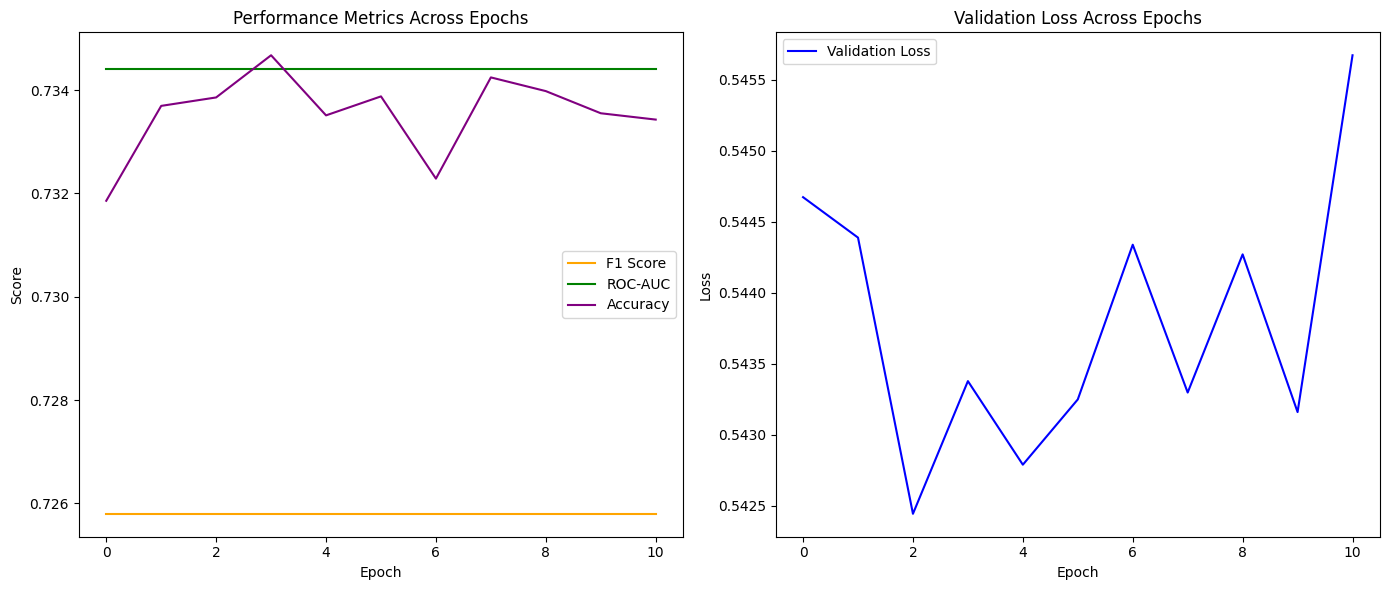

In [58]:
# Plotting the results
plt.figure(figsize=(14, 6))

# Plot Performance Metrics (F1 Score, ROC-AUC, Accuracy) across epochs
plt.subplot(1, 2, 1)
plt.plot(mean_f1_scores, label='F1 Score', color='orange')
plt.plot(mean_roc_aucs, label='ROC-AUC', color='green')
plt.plot(mean_accuracies, label='Accuracy', color='purple')
plt.title('Performance Metrics Across Epochs')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()

# Plot Validation Loss across epochs
plt.subplot(1, 2, 2)
plt.plot(mean_losses, label='Validation Loss', color='blue')
plt.title('Validation Loss Across Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()